# 데이터 불러오기
## SELECT 문으로 불러오기

In [2]:
import pandas as pd
import numpy as np
import sqlite3

In [19]:
con = sqlite3.connect("lpoint.db", isolation_level=None)

In [10]:
# 01_DEMO
demo = pd.read_sql("SELECT * FROM DEMO", con, index_col=None)
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cust       29913 non-null  object
 1   ma_fem_dv  29913 non-null  object
 2   ages       29913 non-null  object
 3   zon_hlv    29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


In [11]:
# 02_PDDE
pdde = pd.read_sql("SELECT * FROM PDDE", con, index_col=None)
pdde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381743 entries, 0 to 4381742
Data columns (total 10 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   cust     object
 1   rct_no   object
 2   chnl_dv  int64 
 3   cop_c    object
 4   br_c     object
 5   pd_c     object
 6   de_dt    int64 
 7   de_hr    int64 
 8   buy_am   int64 
 9   buy_ct   int64 
dtypes: int64(5), object(5)
memory usage: 334.3+ MB


In [12]:
# 03_COP_U
cop_u = pd.read_sql("SELECT * FROM COP_U", con, index_col=None)
cop_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cust     248304 non-null  object
 1   rct_no   248304 non-null  object
 2   cop_c    248304 non-null  object
 3   br_c     248304 non-null  object
 4   chnl_dv  248304 non-null  int64 
 5   de_dt    248304 non-null  int64 
 6   vst_dt   248304 non-null  int64 
 7   de_hr    248304 non-null  int64 
 8   buy_am   248304 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.0+ MB


In [13]:
# 04_PD_CLAC
pd_clac = pd.read_sql("SELECT * FROM PD_CLAC", con, index_col=None)
pd_clac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pd_c          1933 non-null   object
 1   pd_nm         1933 non-null   object
 2   clac_hlv_nm   1933 non-null   object
 3   clac_mcls_nm  1933 non-null   object
dtypes: object(4)
memory usage: 60.5+ KB


In [14]:
# 05_BR
br = pd.read_sql("SELECT * FROM BR", con, index_col=None)
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   br_c      8808 non-null   object
 1   cop_c     8808 non-null   object
 2   zon_hlv   8808 non-null   object
 3   zon_mcls  8808 non-null   object
dtypes: object(4)
memory usage: 275.4+ KB


In [15]:
# 06_LPAY
lpay = pd.read_sql("SELECT * FROM LPAY", con, index_col=None)
lpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cust     353184 non-null  object
 1   rct_no   353184 non-null  int64 
 2   cop_c    353184 non-null  object
 3   chnl_dv  353184 non-null  int64 
 4   de_dt    353184 non-null  int64 
 5   de_hr    353184 non-null  int64 
 6   buy_am   353184 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.9+ MB


In [11]:
## 02_PDDE와 06_LPAY가 겹치는 데이터인지 확인

# practice 2. DEMO 테이블과 PDDE 테이블의 컬럼 select로 불러오기, 중복 제거
# 첫번째 가정. PDDE 테이블이 엄청 큼 -> 근데 LPAY 테이블이 PDDE의 일부분일수도 있을 것 같다는 생각이 듦.
    # PDDE는 결제를 신용카드+현금+상품권 등등으로 한 전체인데 그 중에서 LPAY 테이블은 구매를 LPAY를 이용한 내용만 있을 듯
# 두번째 가정. PDDE는 LPAY로 결제 안한 것들, LPAY테이블은 LPAY로 결제한 것들

con = sqlite3.connect("lpoint.db", isolation_level=None) # lpoint db 생성 or 연결

df3 = pd.read_sql('''
SELECT P.cust, P.rct_no, P.buy_ct, L.cop_c
FROM PDDE AS P, LPAY AS L
WHERE P.cust = L.cust 
GROUP BY P.cust, P.rct_no, P.buy_ct, L.cop_c;
''', con, index_col=None)

con.close()

con = sqlite3.connect("lpoint.db", isolation_level=None) # lpoint db 생성 or 연결

df4 = pd.read_sql('''
SELECT P.cust, L.rct_no, P.buy_ct, L.cop_c
FROM PDDE AS P, LPAY AS L
WHERE P.cust = L.cust 
GROUP BY P.cust, P.rct_no, P.buy_ct, L.cop_c;
''', con, index_col=None)

con.close()

print(df4 == df3)
print(sum(df4['cust'] == df3['cust']))
print(sum(df4['rct_no'] == df3['rct_no']))

         cust  rct_no  buy_ct  cop_c
0        True   False    True   True
1        True   False    True   True
2        True   False    True   True
3        True   False    True   True
4        True   False    True   True
...       ...     ...     ...    ...
3112511  True   False    True   True
3112512  True   False    True   True
3112513  True   False    True   True
3112514  True   False    True   True
3112515  True   False    True   True

[3112516 rows x 4 columns]
3112516
0


## csv 파일로 불러오기
먼저 1, 2, 4, 5 테이블 합친 파일을 불러왔습니다.

In [3]:
import pandas as pd
import numpy as np
import sqlite3

In [4]:
data = pd.read_csv('../data/pdde.csv', encoding='utf-8')

In [ ]:
data.head()

합친 데이터에 들어 있는 테이블을 구분하면, 
1. 01_DEMO : 0-4열
2. 02_PDDE : 6-8,11,15-17열
3. 05_BR : 9-10열
4. 04_PD_CLAC : 12-14열  

결측치는 없는 것을 아래 `info` 함수를 통해 확인했습니다.

In [22]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768605 entries, 0 to 3768604
Data columns (total 18 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   고객번호      3768605 non-null  object
 1   성별        3768605 non-null  object
 2   연령대       3768605 non-null  object
 3   거주지분류대코드  3768605 non-null  object
 4   영수증번호     3768605 non-null  object
 5   구매일자      3768605 non-null  int64 
 6   채널구분      3768605 non-null  int64 
 7   제휴사       3768605 non-null  object
 8   점포코드      3768605 non-null  object
 9   점포대분류코드   3768605 non-null  object
 10  점포중분류코드   3768605 non-null  object
 11  상품코드      3768605 non-null  object
 12  상품대분류명    3768605 non-null  object
 13  상품중분류명    3768605 non-null  object
 14  상품소분류명    3768605 non-null  object
 15  구매시간      3768605 non-null  int64 
 16  구매금액      3768605 non-null  int64 
 17  구매수량      3768605 non-null  int64 
dtypes: int64(5), object(13)
memory usage: 517.5+ MB


# 데이터 분석
## 단순 시각화

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

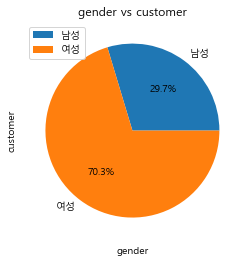

In [18]:
## 성별에 따른 사용자 수 비교
x = data.groupby(by='성별').sum().index
y = data.groupby(by='성별')['고객번호'].count()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('gender vs customer')
plt.xlabel('gender')
plt.ylabel('customer')
plt.pie(y, labels=x.values, autopct = '%.1f%%')
plt.legend()
plt.show()

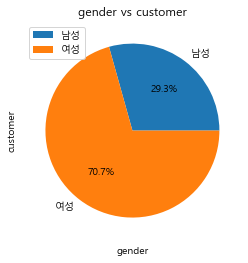

In [17]:
## 성별에 따른 구매금액 비교
x = data.groupby(by='성별').sum().index
y = data.groupby(by='성별').sum()['구매금액']

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('gender vs customer')
plt.xlabel('gender')
plt.ylabel('customer')
plt.pie(y, labels=x.values, autopct = '%.1f%%')
plt.legend()
plt.show()

## 이상치 확인

In [ ]:
plt.boxplot(data[['성별','연령대','거주지분류대코드']])
plt.show()

# 연관분석
* 신뢰도
* 지지도
* 향상도
* 레버리지

## 연관분석에 필요한 전처리
같은 값을 가지는 영수증번호끼리 상품정보 묶기

In [20]:
# 영수증번호가 중복되는지 확인
print('영수증번호 개수:', len(data['영수증번호'].unique()))
data['영수증번호'].unique()

C:\Users\kl122\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


영수증번호 개수: 1168899


array(['A01016688590', 'A01016718167', 'A02357398521', ...,
       'A03073555430', 'A03098830889', 'A05001012161'], dtype=object)

In [90]:
data_drop = data.groupby(['고객번호', '영수증번호'])['상품대분류명'].apply(', '.join).reset_index()
data_drop

C:\Users\kl122\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,고객번호,영수증번호,상품대분류명
0,M000034966,A01016688590,"스포츠패션, 스포츠패션, 스포츠패션"
1,M000034966,A01016718167,스포츠패션
2,M000034966,A02357398521,"속옷/양말/홈웨어, 속옷/양말/홈웨어, 속옷/양말/홈웨어, 속옷/양말/홈웨어"
3,M000034966,A02357415245,건해산물
4,M000034966,A02357420240,여성의류
...,...,...,...
1168894,M999962961,A03073508233,세제/위생
1168895,M999962961,A03073554254,"과일, 과일, 양곡, 채소"
1168896,M999962961,A03073555430,"대용식, 조미료"
1168897,M999962961,A03098830889,"주류, 주류"


In [101]:
# 문자열 값을 쉼표로 구분해리스트로 변환
df_temp = data_drop['상품대분류명']
df_temp = df_temp.str.split(', ')
df_temp

C:\Users\kl122\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                                 [스포츠패션, 스포츠패션, 스포츠패션]
1                                               [스포츠패션]
2          [속옷/양말/홈웨어, 속옷/양말/홈웨어, 속옷/양말/홈웨어, 속옷/양말/홈웨어]
3                                                [건해산물]
4                                                [여성의류]
                               ...                     
1168894                                         [세제/위생]
1168895                                [과일, 과일, 양곡, 채소]
1168896                                      [대용식, 조미료]
1168897                                        [주류, 주류]
1168898                                       [생활/주방가전]
Name: 상품대분류명, Length: 1168899, dtype: object

In [102]:
# 리스트 안의 중복 제거
num = 0
for i in df_temp :
    df_temp[num] = list(set(df_temp[num]))
    num+=1

df_temp = df_temp.tolist()

C:\Users\kl122\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['스포츠패션'],
 ['스포츠패션'],
 ['속옷/양말/홈웨어'],
 ['건해산물'],
 ['여성의류'],
 ['여성의류'],
 ['여성의류'],
 ['청소/세탁/욕실용품', '주류', '채소', '조미료', '과자', '냉동식품', '과일', '대용식', '음료'],
 ['과자', '원예/애완'],
 ['완구'],
 ['주류', '음료'],
 ['음료'],
 ['패션잡화'],
 ['여성의류'],
 ['속옷/양말/홈웨어'],
 ['여성의류'],
 ['여성의류'],
 ['여성의류'],
 ['퍼스널케어'],
 ['여성의류'],
 ['여성의류'],
 ['침구/수예'],
 ['침구/수예'],
 ['식기/조리기구'],
 ['침구/수예'],
 ['패션잡화'],
 ['침구/수예'],
 ['침구/수예'],
 ['침구/수예'],
 ['패션잡화'],
 ['양곡'],
 ['모바일'],
 ['여성의류'],
 ['여성의류'],
 ['속옷/양말/홈웨어'],
 ['아웃도어/레저'],
 ['화장품/뷰티케어'],
 ['여성의류'],
 ['속옷/양말/홈웨어'],
 ['패션잡화'],
 ['남성의류'],
 ['테넌트/음식점'],
 ['대용식'],
 ['병통조림'],
 ['여성의류'],
 ['여성의류'],
 ['남성의류'],
 ['헬스/피트니스'],
 ['아웃도어/레저'],
 ['여성의류'],
 ['여성의류'],
 ['여성의류'],
 ['화장품/뷰티케어'],
 ['패션잡화'],
 ['스포츠패션'],
 ['문구/사무용품'],
 ['채소', '조미료', '과일', '조리식품', '음료'],
 ['테넌트/음식점'],
 ['식기/조리기구'],
 ['침구/수예'],
 ['식기/조리기구'],
 ['패션잡화'],
 ['침구/수예'],
 ['여성의류'],
 ['여성의류'],
 ['남성의류'],
 ['생활/주방가전'],
 ['속옷/양말/홈웨어'],
 ['아웃도어/레저'],
 ['유아동의류'],
 ['유아동의류'],
 ['남성의류'],
 ['패션잡화'],
 ['패션잡화'],
 ['여성의류'],
 ['세제/위생'

## 연관분석

In [113]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

C:\Users\kl122\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
te = TransactionEncoder()
te_ary = te.fit(df_temp).transform(df_temp)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

C:\Users\kl122\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,금융/보험서비스,...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1168895,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1168896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1168897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
sum(df['가구']==True)

C:\Users\kl122\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2936

In [1]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

NameError: name 'apriori' is not defined

In [123]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

C:\Users\kl122\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.116284,(과일)
1,0.161056,(과자)
2,0.060903,(냉동식품)
3,0.124088,(냉장식품)
4,0.131567,(대용식)
5,0.142837,(유제품)
6,0.129233,(음료)
7,0.060927,(조리식품)
8,0.064769,(조미료)
9,0.090049,(주류)


In [124]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

C:\Users\kl122\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(채소),(과일),0.143813,0.116284,0.053414,0.371409,3.193990,0.036690,1.405869
1,(과일),(채소),0.116284,0.143813,0.053414,0.459338,3.193990,0.036690,1.583589
2,(과자),(유제품),0.161056,0.142837,0.051729,0.321187,2.248626,0.028724,1.262738
3,(유제품),(과자),0.142837,0.161056,0.051729,0.362154,2.248626,0.028724,1.315278
4,(채소),(냉장식품),0.143813,0.124088,0.052769,0.366930,2.957020,0.034924,1.383594
5,(냉장식품),(채소),0.124088,0.143813,0.052769,0.425258,2.957020,0.034924,1.489690
6,(채소),(유제품),0.143813,0.142837,0.053554,0.372385,2.607062,0.033012,1.365746
7,(유제품),(채소),0.142837,0.143813,0.053554,0.374930,2.607062,0.033012,1.369745
8,(채소),(축산물),0.143813,0.099341,0.052478,0.364907,3.673266,0.038192,1.418153
9,(축산물),(채소),0.099341,0.143813,0.052478,0.528264,3.673266,0.038192,1.814970
